# **Dog&Cat Image Classification using Convolutional Neural Networks(CNN)**

### **TENSORFLOW & KERAS -TensorFlow (TF) is an open-source deep learning framework by Google. It provides tools to build and train ML & DL models.Keras is a high-level API built on top of TensorFlow .It makes building models easier, faster, and more readable**
### **TensorFlow provides: Computation engine (tf.function, tf.Tensor),GPU/TPU support & Deployment tools (TensorFlow Lite, TensorFlow Serving)**
### **Keras provides:Layers (Dense, Conv2D, etc.),Pre-built models (ResNet, VGG, etc.) & Simple training APIs (model.fit, model.evaluate)**

In [1]:
import numpy as np                 #for Numerical computing, array handling	Image arrays, reshaping, normalization
import random                      #for Data augmentation or Random Sampling
import matplotlib.pyplot as plt    #for Visualization: Display images, plot training curves, predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

### ***Sequential is a linear stack of layers in Keras/TensorFlow, used when model has a single flow of data from input to output,no multiple inputs/outputs,no layer sharing.***
### ***Conv2D (Convolutional Layer):Extracts features (edges, shapes, patterns) from images. Applies filters (kernels) that slide over the image***
### ***MaxPooling2D (Pooling Layer):Reduces the spatial size (height, width) of the feature maps.Helps control overfitting and reduces computation***
### ***Flatten (Flatten Layer):Converts multi-dimensional feature maps into a 1D vector.Prepares the data for the Dense layer.***
### ***Dense (Fully Connected Layer):Standard neural network layer where each neuron is connected to all neurons in the previous layer.Used at the end for classification***

## **Loading Dataset**

In [2]:
import numpy as np
import os

print("Current Directory:", os.getcwd())  # Check this first

# Providing full paths of files
X_train = np.loadtxt(r"G:\ML&DL Projects\CNN_Dog&Cat_ImgClassifier\Data_Excel_sheets\input.csv", delimiter=',')
Y_train = np.loadtxt(r"G:\ML&DL Projects\CNN_Dog&Cat_ImgClassifier\Data_Excel_sheets\labels.csv", delimiter=',')
X_test = np.loadtxt(r"G:\ML&DL Projects\CNN_Dog&Cat_ImgClassifier\Data_Excel_sheets\input_test.csv", delimiter=',')
Y_test = np.loadtxt(r"G:\ML&DL Projects\CNN_Dog&Cat_ImgClassifier\Data_Excel_sheets\labels_test.csv", delimiter = ',')

Current Directory: C:\Users\Dell


In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


## **Reshaping  Dataset**

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

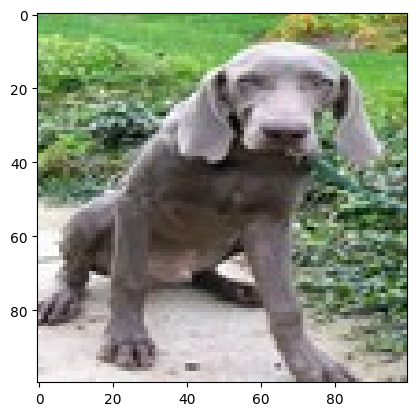

In [6]:
#On TRAINING (Larger) Dataset
idx = random.randint(0, len(X_train)) # Random generation of images using indexes , variable used 'idx' 
plt.imshow(X_train[idx, :])
plt.show()

## **BUILDING MODEL**

In [7]:
from keras.layers import Input 
# Using Input separately is cleaner, standard, and avoids warnings. It works for both simple Sequential & complex Functional models.

model = Sequential([
    Input(shape=(100, 100, 3)),                          # ✅ Separate Input layer
    Conv2D(32, (3,3), activation='relu'),                
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

In [9]:
model = Sequential()
# Individually Adding all layers...
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Compilation by adding Loss and Back Propogation Algorithm 
# The given loss measures the dissimilarity between the true labels and the predicted probabilities between two classes

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
# An Epoch is one complete pass through the entire training dataset by the model.If you have 1000 training images and set epochs=10,
# the model will see all 1000 images 10 times during training. Batch Size refers to the number of samples processed before the model updates its weights.
# If you set batch_size=32, the model looks at 32 samples at a time → computes the loss → updates the weights

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.5002 - loss: 0.8199
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.5388 - loss: 0.6866
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.6094 - loss: 0.6553
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.6687 - loss: 0.6151
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.7283 - loss: 0.5527


### **ACCURACIES ⬆️ LOSSES ⬇️**

In [12]:
model.evaluate(X_test, Y_test) # for evaluation of Tests Datasets

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5966 - loss: 0.6752


[0.6053504347801208, 0.6650000214576721]

## ***Making Final Predictions***

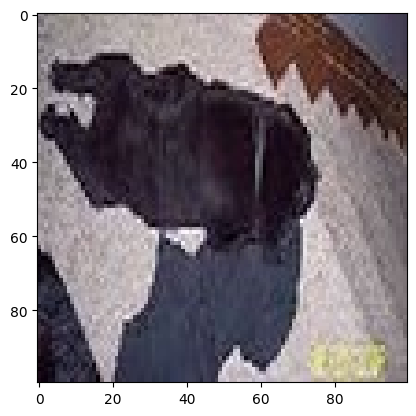

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This is a image of a DOG


In [14]:
#On TESTING (Smaller) Dataset
idx2 = random.randint(0, len(Y_test)) # Random generation of images using indexes , variable used 'idx2'
plt.imshow(X_test[idx2, :])
plt.show()

# Classification : O predicts for DOGS and 1 predicts for CATS.
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'DOG'
else:
    pred = 'CAT'
    
print("This is a image of a", pred)